<a href="https://colab.research.google.com/github/johnsureshp/deep-learning-projedts/blob/main/used_car_price_pridection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING DATA **

In [3]:
df = pd.read_csv('/content/used_car_dataset.csv')
df.head(10)

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019
5,Maruti Suzuki Eeco 5 STR WITH A/C+HTR [2019-2020],₹ 3.72 Lakh,"42,906 km",Petrol,Chennai,2017
6,Hyundai Creta SX Plus 1.6 AT CRDI,₹ 11.5 Lakh,"66,602 km",Diesel,Mumbai,2017
7,Maruti Suzuki Ertiga VXi AT,₹ 10.39 Lakh,"13,189 km",Petrol,Bangalore,2019
8,Toyota Etios Liva G,₹ 3.75 Lakh,"67,815 km",Petrol,Mumbai,2013
9,Renault Kwid 1.0 RXT AMT Opt [2016-2019],₹ 4.25 Lakh,"19,509 km",Petrol,Mumbai,2018


In [4]:
df.car_name[0].split(' ')

['Hyundai', 'Grand', 'i10', 'Magna', '1.2', 'Kappa', 'VTVT', '[2017-2020]']

In [5]:
df.car_name[0].split(' ')[0]

'Hyundai'

In [6]:
df.shape

(2105, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


In [8]:
df.size

12630

In [9]:
df.isna().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

In [10]:
df.select_dtypes(include = 'object').describe()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city
count,2105,2105,2105,2105,2105
unique,946,811,1628,8,16
top,Maruti Suzuki Wagon R 1.0 VXI,₹ 4.75 Lakh,"45,000 km",Petrol,Bangalore
freq,25,23,17,1348,248


In [11]:
df['car_name'] = df['car_name'].apply(lambda x : x.split(' ')[0])
df.head()


,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep,₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [12]:
df['car_price_in_rupees'] = df['car_price_in_rupees'].replace(r'₹|Lakh|Crore|,', '', regex=True).astype(float)*100000
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai,445000.0,"22,402 km",Petrol,Mumbai,2016
1,Maruti,293000.0,"10,344 km",Petrol,Kolkata,2019
2,Tata,2249000.0,"12,999 km",Diesel,Bangalore,2021
3,Maruti,695000.0,"45,000 km",Petrol,Thane,2016
4,Jeep,1200000.0,"11,193 km",Petrol,Kolkata,2019


In [13]:
df['kms_driven']= df['kms_driven'].replace(',|km','',regex =True).astype(float)
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai,445000.0,22402.0,Petrol,Mumbai,2016
1,Maruti,293000.0,10344.0,Petrol,Kolkata,2019
2,Tata,2249000.0,12999.0,Diesel,Bangalore,2021
3,Maruti,695000.0,45000.0,Petrol,Thane,2016
4,Jeep,1200000.0,11193.0,Petrol,Kolkata,2019


In [14]:
df.drop(['city'],axis=1, inplace=True)
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture
0,Hyundai,445000.0,22402.0,Petrol,2016
1,Maruti,293000.0,10344.0,Petrol,2019
2,Tata,2249000.0,12999.0,Diesel,2021
3,Maruti,695000.0,45000.0,Petrol,2016
4,Jeep,1200000.0,11193.0,Petrol,2019


In [15]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Diesel + 1', 'Electric', 'CNG', 'Petrol + 1',
       'Hybrid', 'LPG'], dtype=object)

<Axes: xlabel='fuel_type', ylabel='Count'>

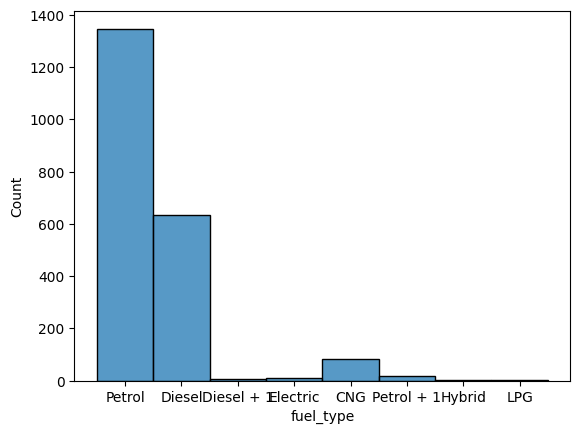

In [16]:
sns.histplot(df['fuel_type'])


In [17]:
df.loc[df["fuel_type"] == "Diesel + 1", "fuel_type"] = "Diesel"
df.loc[df["fuel_type"] == "Petrol + 1", "fuel_type"] = "Petrol"


In [19]:
df.loc[df.fuel_type == "Hybrid"].index

Index([735, 1588], dtype='int64')

In [20]:
df = df.drop(df[(df.fuel_type == "Hybrid")].index)
df = df.drop(df[(df.fuel_type == "LPG")].index)


<Axes: xlabel='fuel_type', ylabel='Count'>

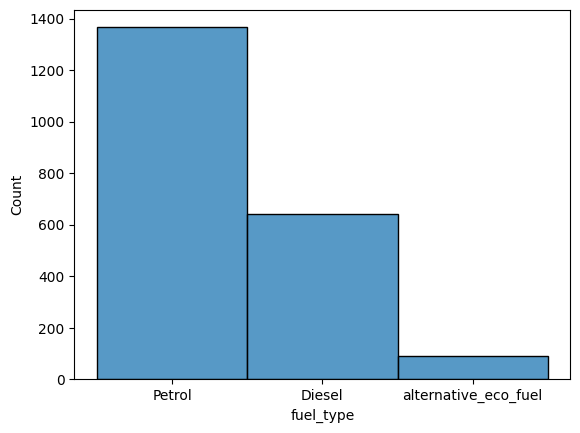

In [21]:
df['fuel_type'] = df['fuel_type'].replace(['Electric', 'CNG'], 'alternative_eco_fuel')
sns.histplot(df['fuel_type'])



In [22]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['fuel_type'] = label.fit_transform(df['fuel_type'])
df.fuel_type.unique()

array([1, 0, 2])

In [23]:
from datetime import datetime
current_year = datetime.now().year
df['age'] = current_year - df['year_of_manufacture']

In [24]:
df['car_name'] = label.fit_transform(df['car_name'])
df.car_name.unique()

array([ 9, 18, 24, 12, 25, 22,  3, 19,  7, 21, 13,  1,  8,  0, 15, 23, 26,
       27, 17, 20, 14, 10, 11, 16,  5,  6,  4,  2])

In [25]:
df.drop(columns=['year_of_manufacture'],inplace = True)
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,age
0,9,445000.0,22402.0,1,8
1,18,293000.0,10344.0,1,5
2,24,2249000.0,12999.0,0,3
3,18,695000.0,45000.0,1,8
4,12,1200000.0,11193.0,1,5


In [26]:
df['fuel_type'].unique()

array([1, 0, 2])

In [27]:
#car_brands = list(df['car_name'].unique())
#print(car_brands)

In [28]:
#df.insert(1, "car_brand", df["car_name"].str.split(" ").str[0])
#df.head()

In [29]:
'''car_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Toyota', 'Volkswagen', 'Porsche', 'Volvo', 'Jaguar', 'Land',
              'Ford', 'Honda', 'Chevrolet', 'Hyundai', 'Kia', 'Nissan', 'Renault', 'Skoda', 'MINI', 'MG', 'Mahindra',
              'Tata', 'Isuzu', 'Jeep', 'Datsun', 'Fiat', 'Citroen', 'Bentley','Maruti']
for brand_name in car_brands:
    df.loc[df["car_brand"] == brand_name, "car_brand"] = (((car_brands.index(brand_name) + 1) / len(df)) * 100)
df.car_brand.unique()'''

'car_brands = [\'Mercedes-Benz\', \'BMW\', \'Audi\', \'Toyota\', \'Volkswagen\', \'Porsche\', \'Volvo\', \'Jaguar\', \'Land\',\n              \'Ford\', \'Honda\', \'Chevrolet\', \'Hyundai\', \'Kia\', \'Nissan\', \'Renault\', \'Skoda\', \'MINI\', \'MG\', \'Mahindra\',\n              \'Tata\', \'Isuzu\', \'Jeep\', \'Datsun\', \'Fiat\', \'Citroen\', \'Bentley\',\'Maruti\']\nfor brand_name in car_brands:\n    df.loc[df["car_brand"] == brand_name, "car_brand"] = (((car_brands.index(brand_name) + 1) / len(df)) * 100)\ndf.car_brand.unique()'

In [32]:
#df['car_brand']=df['car_brand'].astype(float)
#df.drop(columns=['car_name'],inplace = True)



FINDING OUTLIER'S

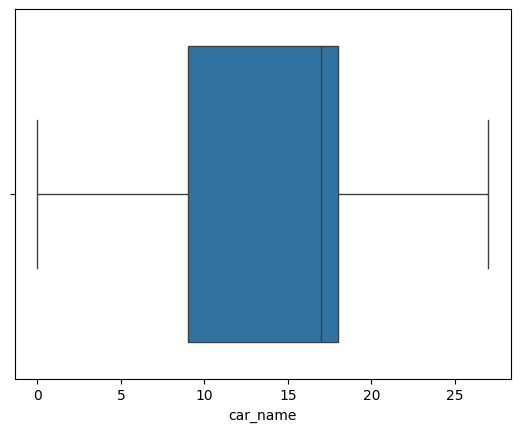

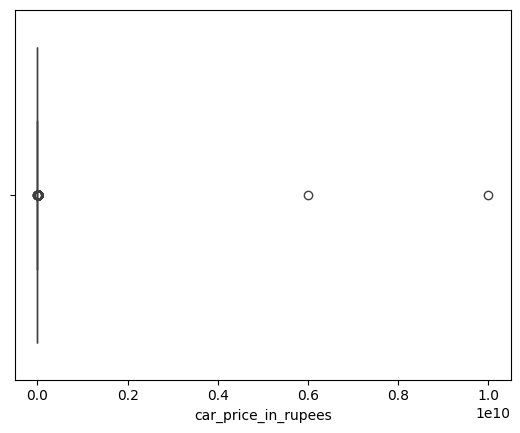

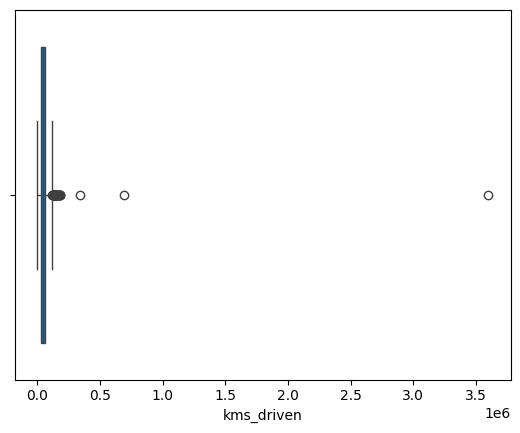

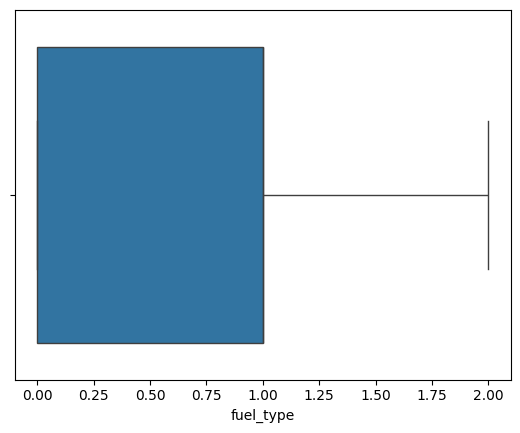

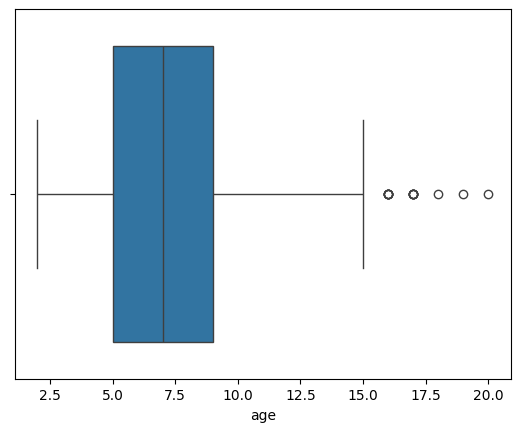

In [33]:
import seaborn as sns
for i in df.select_dtypes(include = 'number').columns:
  sns.boxplot(data=df,x = i)
  plt.show()


<Axes: >

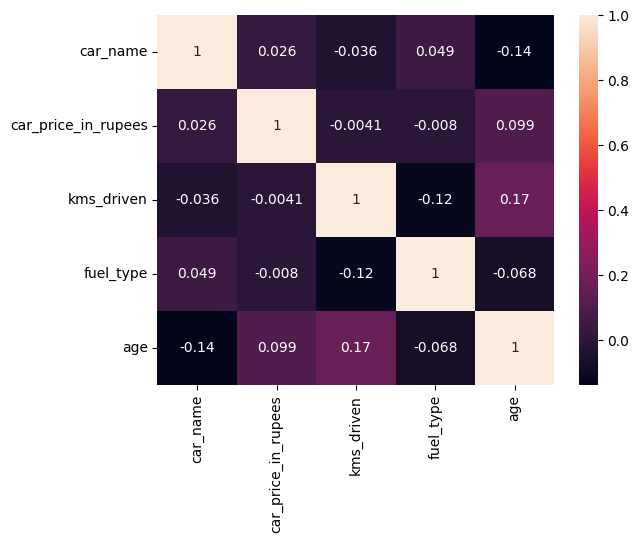

In [35]:
s=df.select_dtypes(include = 'number').corr()
sns.heatmap(s, annot =True)

REMOVING OUTLIER'S

In [36]:
def wisker(col):
  q1,q3 = np.percentile(col,[25,75])
  IQR = q3-q1
  lower = q1-1.5*IQR
  upper = q3+1.5*IQR
  return lower,upper

In [37]:
for i  in ['car_price_in_rupees','kms_driven','age']:
  lw,uw = wisker(df[i])
  df[i]= np.where(df[i]<lw , lw,df[i])
  df[i]= np.where(df[i]>uw ,uw,df[i])


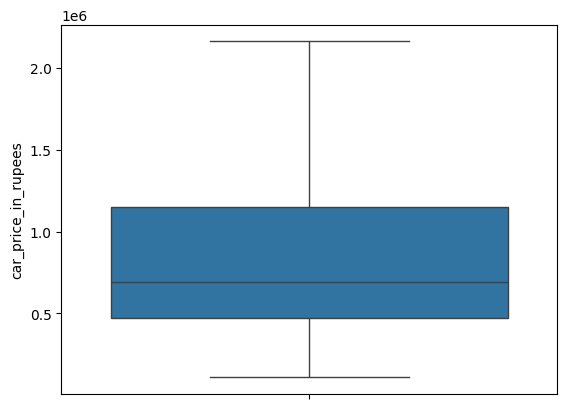

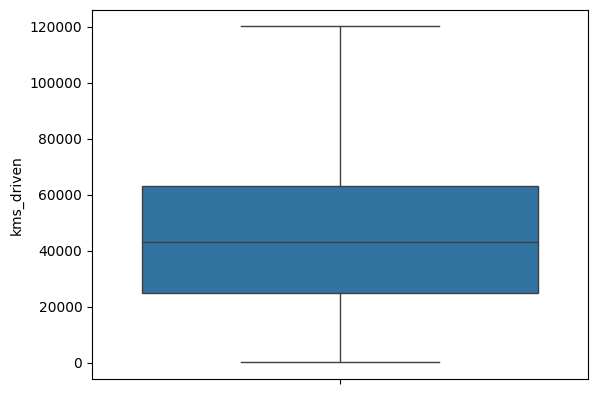

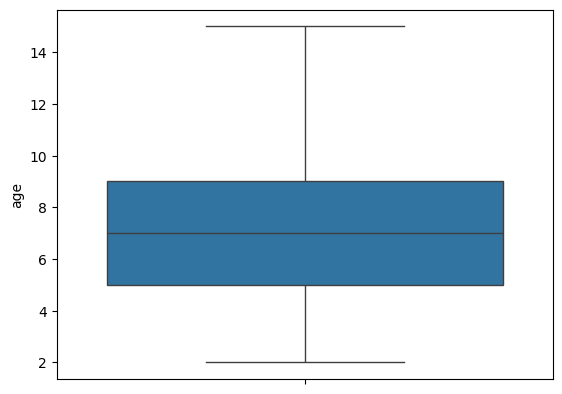

In [38]:
for i  in ['car_price_in_rupees','kms_driven','age']:
  sns.boxplot(df[i])
  plt.show()

In [39]:
df.dropna(inplace =True)

In [40]:
X=df.drop('car_price_in_rupees',axis=1)
y=df['car_price_in_rupees']


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [42]:
X_train.shape,X_test.shape

((1470, 4), (631, 4))

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [44]:
X_train_scaled.shape

(1470, 4)

**RandomForestRegressor **

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=32)

rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)



Mean absolute error 213453.79329861896
R2 Score 0.7197130430788222


In [47]:
yp =rf.predict([[8,	22402.0 , 	1	 ,8]])
print(yp)

[403140.]


In [48]:
df.head(2)

,car_name,car_price_in_rupees,kms_driven,fuel_type,age
0,9,445000.0,22402.0,1,8.0
1,18,293000.0,10344.0,1,5.0


XGBRegressor and hyper tuning using **GridSearchCV**

In [49]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5,
              scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_score}')

best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best MAE: 207654.15363520413
Mean Squared Error: 80815287988.28908
R-squared: 0.7623627485306536
Mean Absolute Error: 199547.06529813787
